**Investigating energy conservation in the case of a projected force**

In [1]:
import sys
sys.path.append("../..")
import numpy as np
import matplotlib.pyplot as plt

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [7]:
from wobble.pure import PureMA
num_modes='all'
ma=PureMA('test', 3, 
                 mesh_file='../sample_data_files/mesh_files/beam.msh',
             material_file='../sample_data_files/material_files/steel.dat',
                  num_modes=10,
                 projected_force_path='../sample_data_files/force_files/projected_force.txt',
                 eigenmode_path='../sample_data_files/eigenmode_files/clamped_modes.csv')

overload_bc_dicts=[{'type': 'FixedValue', 'value': 0.0, 'axis': 'x', 'group': 'right'},
                    {'type': 'FixedValue', 'value': 0.0, 'axis': 'y', 'group': 'right'},
                    {'type': 'FixedValue', 'value': 0.0, 'axis': 'z', 'group': 'right'}]
time_array = np.linspace(0, .25, 1000)

ma.solve(time_array=time_array, overload_bc_dicts=overload_bc_dicts)

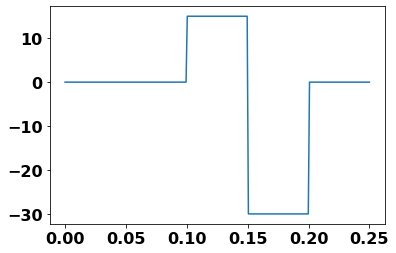

In [8]:
ma.get_force_energy_correction()
ma.get_energy()

pts=int(1000*0.25)
force_plot=list(np.ones(int(pts*0.1/0.25))*0)+list(np.ones(int(pts*0.05/0.25))*15)+list(np.ones(int(pts*0.05/0.25))*-30)+list(np.ones(int(pts*0.05/0.25))*0)

plt.plot(np.linspace(0,0.25,pts), force_plot)
plt.show()

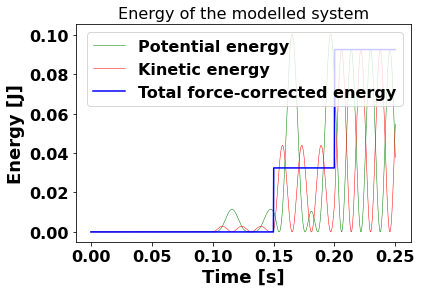

In [9]:
ma.plot_energy(True)

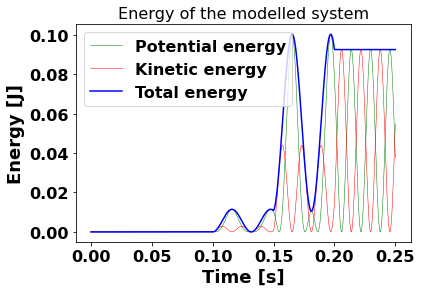

In [10]:
ma.plot_energy(False)

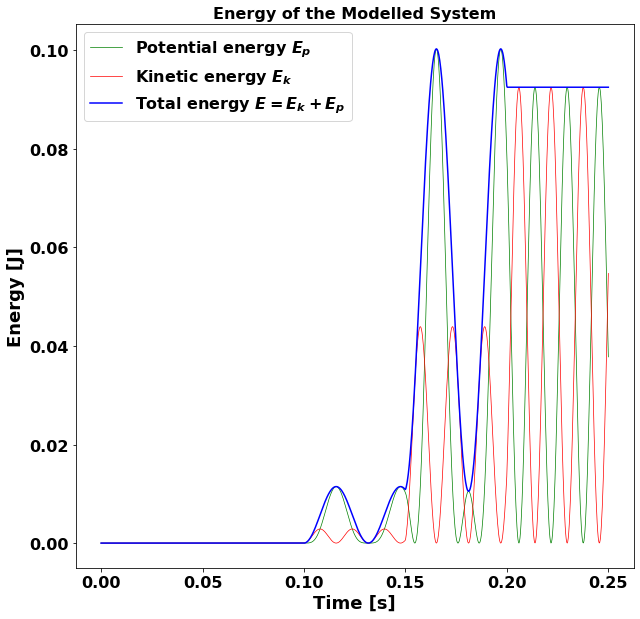

In [11]:
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(ma.time_array, ma.vib_pe, 'g-', linewidth=.7, label='Potential energy $E_p$')
ax.plot(ma.time_array, ma.vib_ke, 'r-', linewidth=.7, label='Kinetic energy $E_k$')

if False:
    ax.plot(ma.time_array, ma.vib_ke + ma.vib_pe - ma.force_energy_correction, 'b-', label='Total force-corrected energy')
else:
    ax.plot(ma.time_array, ma.vib_ke + ma.vib_pe, 'b-', linewidth=1.5, label='Total energy $E=E_k+E_p$')

plt.title('Energy of the Modelled System', fontweight="bold")
plt.xlabel('Time [s]')
plt.ylabel('Energy [J]')
plt.legend()
#plt.savefig('energy.png', bbox_inches='tight')
plt.show()

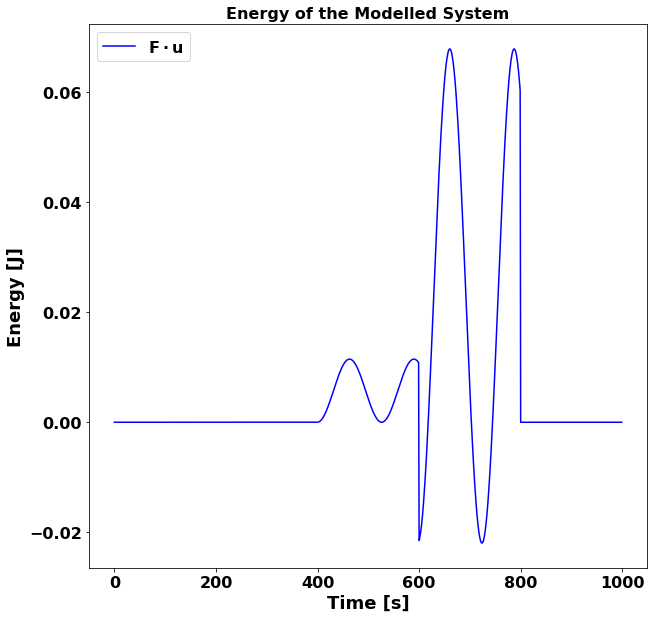

In [12]:
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(ma.force_energy_correction, 'b-', label='$\mathbf{F} \cdot \mathbf{u}$')
plt.title('Energy of the Modelled System', fontweight="bold")
plt.xlabel('Time [s]')
plt.ylabel('Energy [J]')
plt.legend(loc='upper left')
#plt.savefig('fdotu.png', bbox_inches='tight')
plt.show()

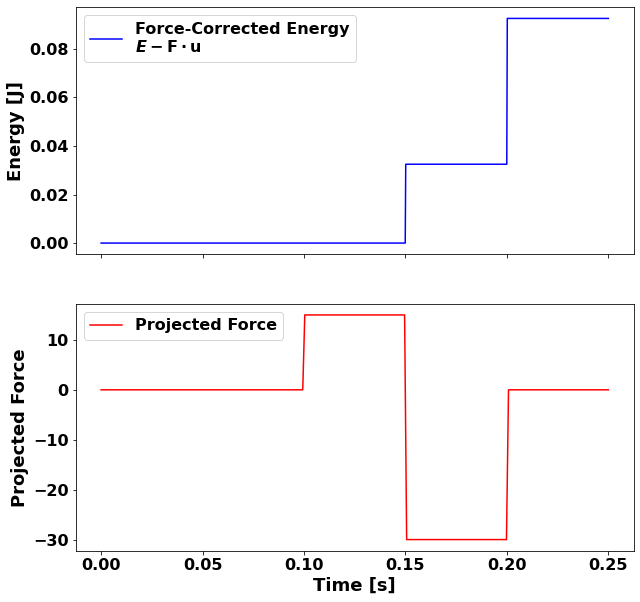

In [13]:
fig,ax=plt.subplots(2, figsize=(10,10), sharex=True)
ax1=ax[0]
ax2=ax[1]
ax1.plot(ma.time_array, (ma.vib_ke + ma.vib_pe - ma.force_energy_correction), 'b-', label='Force-Corrected Energy\n$E - \mathbf{F} \cdot \mathbf{u}$')
ax2.plot(np.linspace(0,0.25,pts), force_plot, 'r-', label="Projected Force")

ax2.set_xlabel('Time [s]')
ax1.set_ylabel('Energy [J]')
ax2.set_ylabel('Projected Force')
ax1.legend()
ax2.legend(loc='upper left')
#plt.savefig('force_corrected_energy.png', bbox_inches='tight')

plt.show()